### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing & Loading the dataset

In [2]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Dataset Shape:

In [4]:
df.shape

(614, 13)

### Dataset Description:

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Checking the Missing Values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [7]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [8]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

### Let's confirm if there are any missing values in 'LoanAmount' & 'Credit_History'

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Now, Let's drop all the missing values remaining.

In [10]:
df.dropna(inplace=True)

### Let's check the Missing values for the final time!

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

### Now, Let's check the final Dataset Shape

In [12]:
df.shape

(542, 13)

### Exploratory Data Analyis

#### Comparison between Genders in getting the Loan:

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


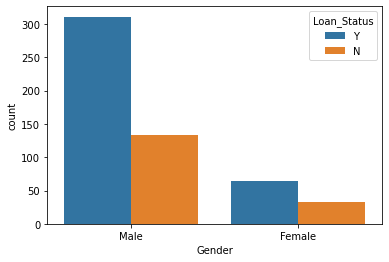

In [13]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Here, we can see that the **Males** have more chances to get the Loan.

#### Comparison between Married Status in getting the Loan:

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


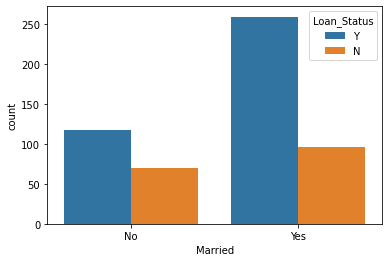

In [14]:
sns.countplot(df['Married'],hue=df['Loan_Status'])
print(pd.crosstab(df['Married'],df['Loan_Status']))

Here, we can see that the **Married Person** has more chance of getting the Loan.

#### Comparison between Education Status of an Individual in getting the Loan:

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


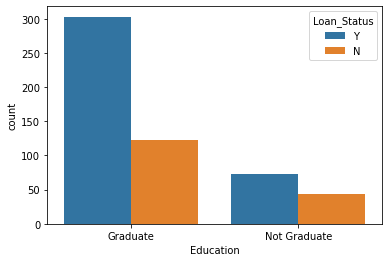

In [15]:
sns.countplot(df['Education'],hue=df['Loan_Status'])
print(pd.crosstab(df['Education'],df['Loan_Status']))

Here, we can see that a **Graduate Individual** has more chance of getting the Loan.

#### Comparison between Self-Employed or Not in getting the Loan:

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


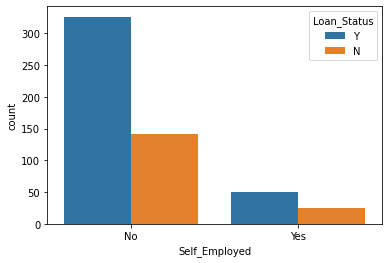

In [16]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Here, we can see that **Not Self-Employed** has more chance of getting the Loan.

#### Comparison between Property Area for getting the Loan:

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


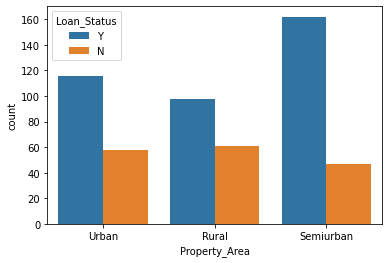

In [17]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Here, we can see that People living in **Semi-Urban** Area have more chance to get the Loan.

### Let's replace the Variable values to Numerical form & display the Value Counts

The data in Numerical form avoids disturbances in building the model. 

In [18]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [19]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [20]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [21]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [22]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [23]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [24]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [25]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [26]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

In [27]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

### Display the Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

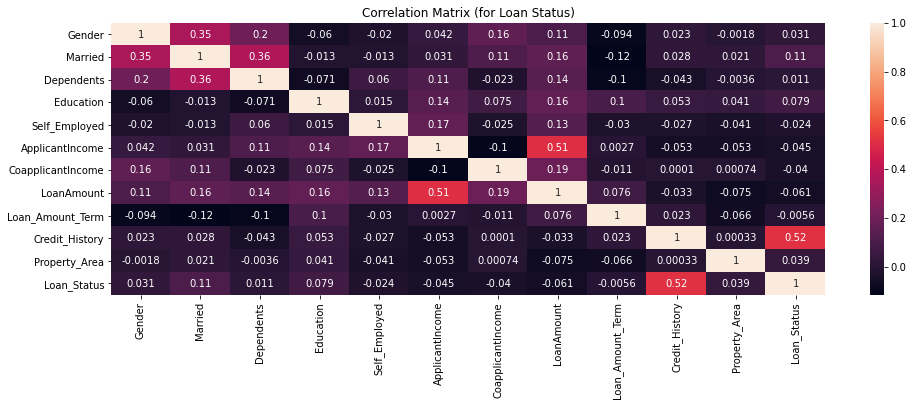

In [29]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

From the above figure, we can see that **Credit_History** (Independent Variable) has the maximum correlation with **Loan_Status** (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

### Final DataFrame

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### Importing Packages for Classification algorithms

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### Splitting the data into Train and Test set

In [32]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [34]:
print(X_train)

[[  1.   1.   3. ... 360.   1.   0.]
 [  1.   1.   2. ... 180.   1.   2.]
 [  1.   1.   1. ... 360.   1.   1.]
 ...
 [  1.   1.   2. ... 360.   1.   2.]
 [  1.   1.   3. ... 360.   0.   0.]
 [  0.   1.   2. ... 360.   1.   1.]]


In [35]:
print(X_test)

[[  0.   1.   2. ... 360.   1.   2.]
 [  1.   1.   2. ... 360.   0.   0.]
 [  1.   0.   0. ... 360.   0.   0.]
 ...
 [  1.   0.   0. ... 360.   1.   1.]
 [  1.   1.   0. ... 360.   1.   1.]
 [  1.   1.   3. ... 360.   0.   1.]]


In [36]:
print(y_train)

[1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 0 0 1 1 1 1 0 1]


### Logistic Regression (LR)

In [37]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

lr_prediction = lr_model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7914110429447853


C:\Users\Konderu Bhavani\anaconda3\envs\loan\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Support Vector Machine (SVM)

In [38]:
svm_model = svm.SVC()
svm_model.fit(X_train,y_train)

svc_prediction = svm_model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))

SVM accuracy =  0.6503067484662577


### Decision Tree

In [39]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

dt_prediction = dt_model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree accuracy =  0.7177914110429447


### K-Nearest Neighbors (KNN)

In [40]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

knn_prediction =knn_model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))

KNN accuracy =  0.6196319018404908


## Random Forest

In [41]:
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

rf_prediction=rf_model.predict(X_test)
print('random forest accuracy = ',metrics.accuracy_score(rf_prediction,y_test))

random forest accuracy =  0.7730061349693251


**CONCLUSION:**

1. The Loan Status is heavily dependent on the Credit History for Predictions.
2. The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to the other 4 Machine Learning Classification Algorithms.

In [42]:
import pickle
pickle.dump(lr_model,open('model.pkl','wb'))